In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import logging, os

logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping

import numpy as np

In [3]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NetworkPathLoss/base_los_dist_pathloss.csv").sample(frac=1)
data.drop(columns=["LOS"], inplace=True)

In [4]:
def scale_data(X):
    return StandardScaler().fit_transform(X)

def create_model(X_train_shape):
    model = Sequential([
        Conv1D(
            filters=64,
            kernel_size=2,
            activation='relu',
            input_shape=(X_train_shape, 1)
            # padding='same'
        ),
        Flatten(),
        Dense(
            units=64,
            activation='relu'
        ),
        Dense(
            units=1,
            activation='linear'
        )
    ])
    return model

def fit_data(model, X_train, y_train):
    history = model.fit(
        x                = X_train,
        y                = y_train,
        epochs           = 10,
        batch_size       = 32,
        validation_split = 0.2
    )
    return history

def predict(model, X_test):
    return model.predict(X_test)

array([[<Axes: title={'center': 'Number of BS'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Pathloss'}>, <Axes: >]], dtype=object)

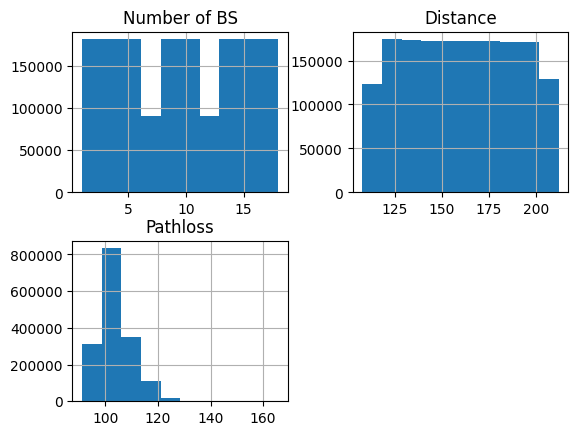

In [5]:
data.hist()

Text(0, 0.5, 'Pathloss')

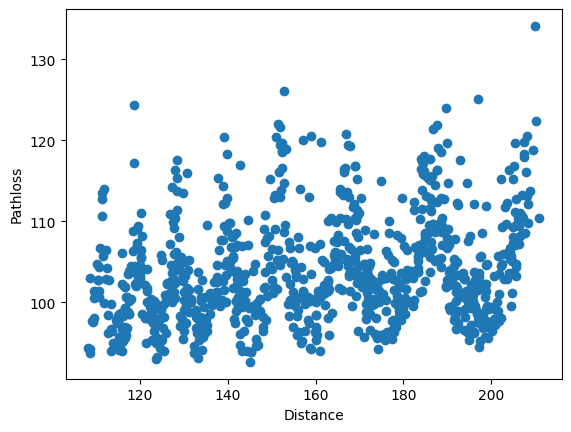

In [6]:
plt.scatter(data['Distance'].iloc[:900], data.Pathloss[:900])
plt.xlabel('Distance')
plt.ylabel("Pathloss")

Text(0, 0.5, 'Distance')

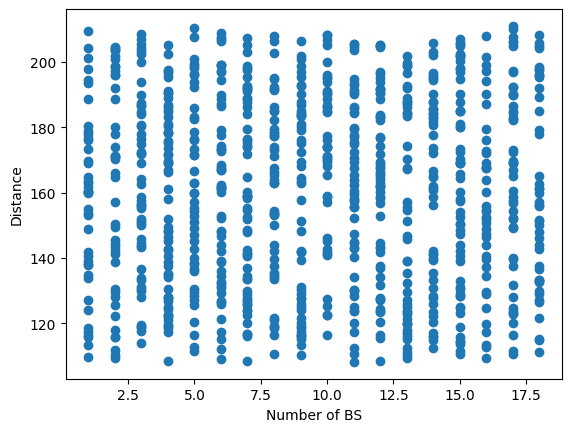

In [7]:
plt.scatter(data['Number of BS'].iloc[:900], data.Distance[:900])
plt.xlabel('Number of BS')
plt.ylabel("Distance")

Text(0, 0.5, 'Pathloss')

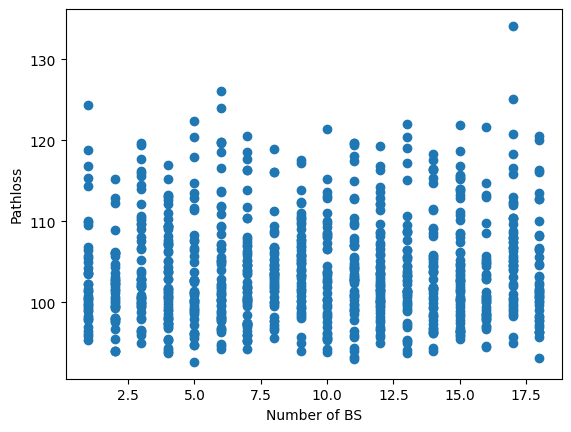

In [8]:
plt.scatter(data['Number of BS'].iloc[:900], data.Pathloss[:900])
plt.xlabel('Number of BS')
plt.ylabel("Pathloss")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Number of BS', 'Distance']], # X
    data['Pathloss'], # y
    test_size = 0.2,
    random_state = 42
)

X_train = scale_data(X_train)
X_test  = scale_data(X_test)

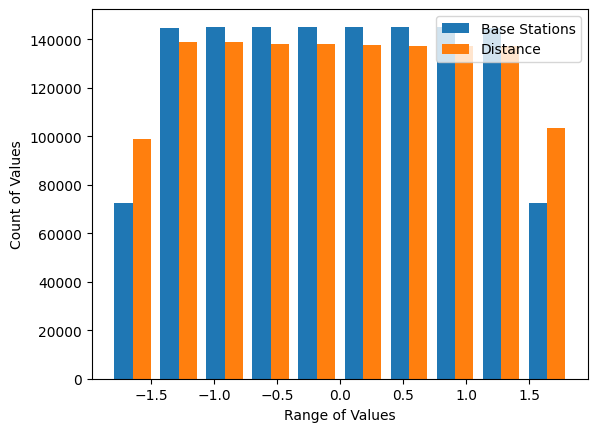

In [10]:
plt.hist(X_train)
plt.xlabel("Range of Values")
plt.ylabel("Count of Values")
plt.legend(["Base Stations", "Distance"])

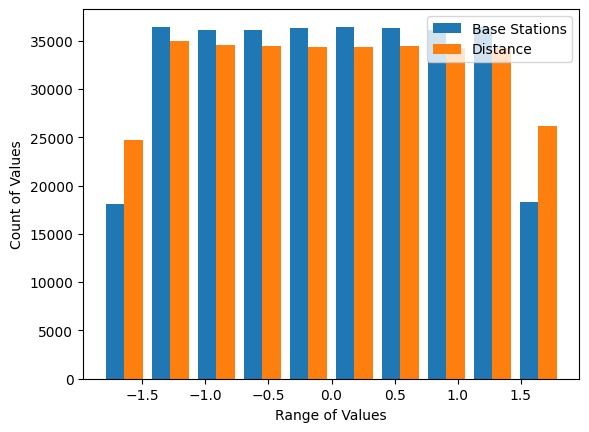

In [11]:
plt.hist(X_test)
plt.xlabel("Range of Values")
plt.ylabel("Count of Values")
plt.legend(["Base Stations", "Distance"])

In [12]:
model   = create_model(X_train.shape[1])
model.compile(optimizer='adam', loss='mean_squared_error' )

history = fit_data(model, X_train, y_train)
y_pred  = predict(model, X_test)

print(f'Mean Squared Error on Test Set: {mean_squared_error(y_test, y_pred)}')

Epoch 1/10
32646/32646 [==============================] - 57s 2ms/step - loss: 78.3811 - val_loss: 34.2417
Epoch 2/10
32646/32646 [==============================] - 56s 2ms/step - loss: 34.5134 - val_loss: 35.2803
Epoch 3/10
32646/32646 [==============================] - 55s 2ms/step - loss: 33.8667 - val_loss: 33.6111
Epoch 4/10
32646/32646 [==============================] - 56s 2ms/step - loss: 31.8817 - val_loss: 30.9984
Epoch 5/10
32646/32646 [==============================] - 56s 2ms/step - loss: 27.8823 - val_loss: 26.2025
Epoch 6/10
32646/32646 [==============================] - 56s 2ms/step - loss: 26.2989 - val_loss: 25.1971
Epoch 7/10
32646/32646 [==============================] - 56s 2ms/step - loss: 26.0022 - val_loss: 26.9245
Epoch 8/10
32646/32646 [==============================] - 56s 2ms/step - loss: 25.9451 - val_loss: 28.4290
Epoch 9/10
32646/32646 [==============================] - 56s 2ms/step - loss: 25.8960 - val_loss: 26.1367
Epoch 10/10
10202/10202 [============

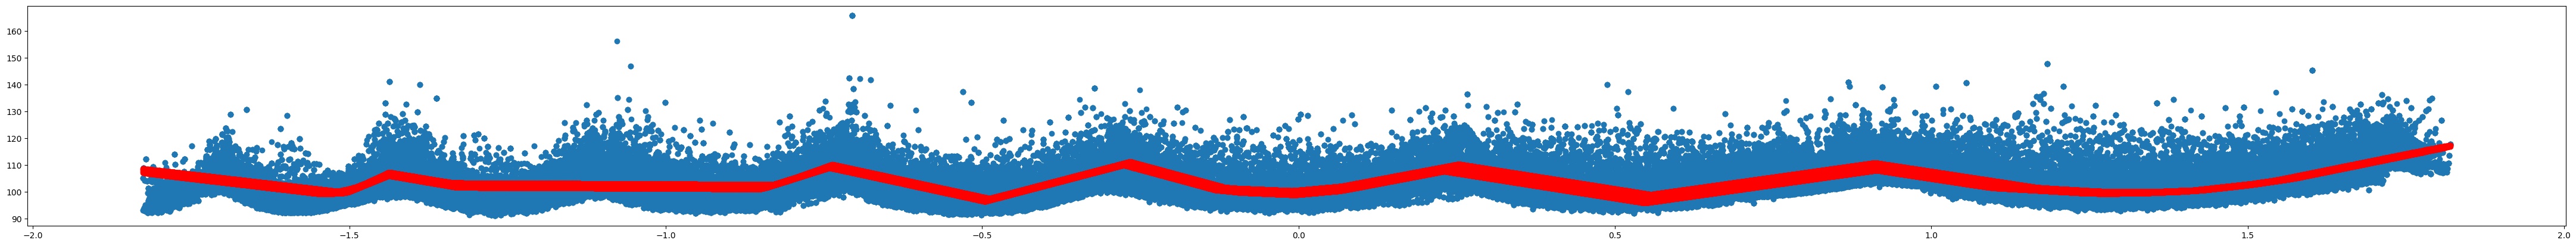

In [15]:
start_index = None
end_index   = None
plt.figure().set_figwidth(55)
plt.scatter(X_test[start_index:end_index,1], y_test[start_index:end_index])
plt.scatter(X_test[start_index:end_index,1], y_pred[start_index:end_index], color='red')

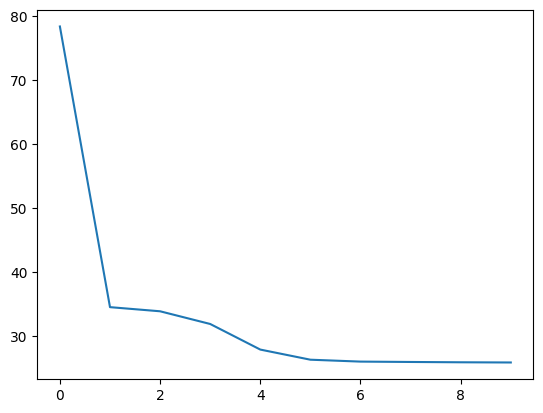

In [14]:
plt.plot(history.history['loss'])